In [3]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# 1 PreProcessing
* Algoritmos de aprendizagem tem afinidade com certos padroes dos dados
* Dados fora de escala e padrao tem uma incerteza na predicao
* Algoritmos de aprendizagem entendem apenas numeros, entao e necessaria a conversao de texto em numeros
* O preprocessamento refere-se a transformacao dos dados antes de realizar o Machine Leaning

## 1.1 StandardScale
* O Standard Scale assume que os dados estao normalmente distribuidos
* $ \frac{x_1 - x_mean}{desvio(x)}$

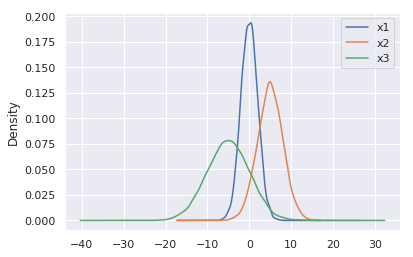

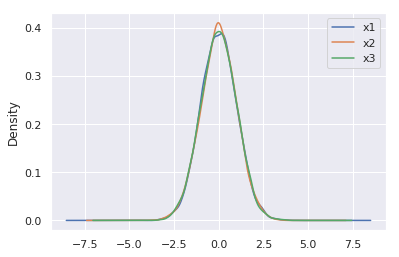

In [13]:
from sklearn.preprocessing import StandardScaler
#Gerando distribuicao normal-------------
df = pd.DataFrame({
    'x1' : np.random.normal(0,2,10000),
    'x2' : np.random.normal(5,3,10000),
    'x3' : np.random.normal(-5,5,10000),
})
#------------------------------------------
standardscaler = StandardScaler()
data_tf = standardscaler.fit_transform(df)
df2 = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
#--------------------------------------
df.plot.kde()
df2.plot.kde()

## 1.2 MinMaxScaler
 $$\frac{x_1 - min(x)}{max(x) - min(x)}$$
 
* Dados variam entre 0 e 1
* Se a distribuicao nao for boa para StandardScaler, isse Scaler funcionara
* Sensivel para Outliers

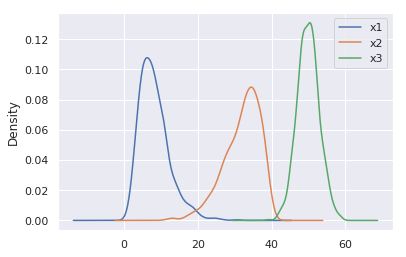

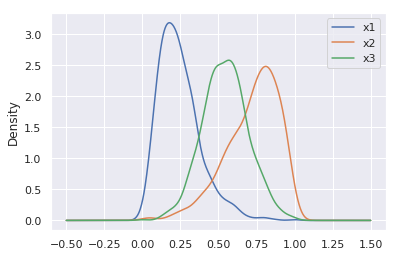

In [15]:
from sklearn.preprocessing import MinMaxScaler
#---------------------------------
df = pd.DataFrame({
    'x1': np.random.chisquare(8,1000),
    'x2': np.random.beta(8,2,1000)*40,
    'x3': np.random.normal(50,3,1000)
})
#-------------------------------
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)
df2 = pd.DataFrame(data_tf, columns=['x1', 'x2', 'x3'])
df.plot.kde()
df2.plot.kde()

# 1.3. Robust Scaler
* Acomoda Outliers
* Q = Quartil
$$ \frac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}$$

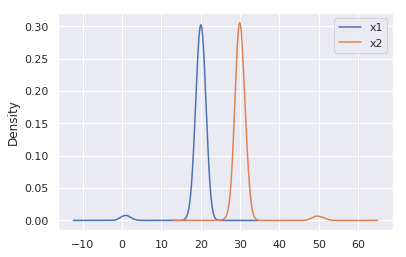

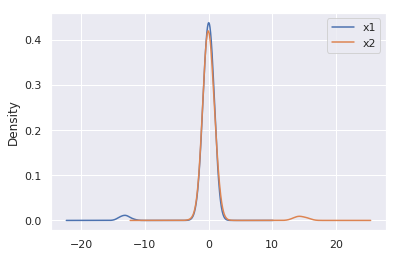

In [18]:
from sklearn.preprocessing import RobustScaler
#-------------------------------------------
df = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20,1,1000), np.random.normal(1,1,25)]),
    'x2': np.concatenate([np.random.normal(30,1,1000), np.random.normal(50,1,25)]),
})
#---------------------------------------------
robustscaler = RobustScaler()
data_tf = robustscaler.fit_transform(df)
df2 = pd.DataFrame(data_tf, columns=['x1', 'x2'])
#-----------------------------------------------
df.plot.kde()
df2.plot.kde()

# 1.4 Normalizador
* Cada parametro e dividido por sua magnetude
* Centraliza os dados na origem
$$ \frac{x_1}{\sqrt{x_i^2 + y_i^2 + z_i^2}}$$

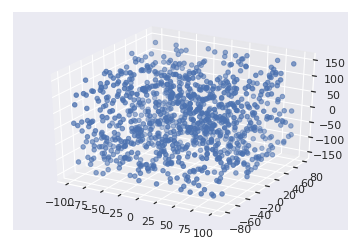

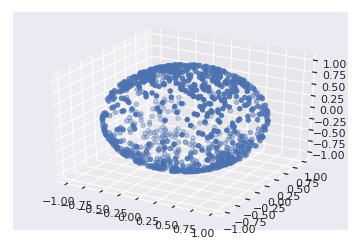

In [102]:
from sklearn.preprocessing import Normalizer
#-------------------------------
df = pd.DataFrame({
    'x1': np.random.randint(-100,100,1000).astype(float),
    'y1': np.random.randint(-80,80,1000).astype(float),
    'z1': np.random.randint(-150,150,1000).astype(float),
})
#---------------------------------------
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)
df2 = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

#--------------------------------------
f, axes= plt.subplots(2, 2)
axes = plt.axes(projection='3d')
axes.scatter3D(df.x1,df.y1,df.z1)
#------------------------------
f, axes = plt.subplots()
axes = plt.axes(projection='3d')
axes.scatter3D(df2.x1,df2.y1,df2.z1)
plt.show()

# 1.5 Binarizacao
* Alteracao para valores binarios 0 e 1

In [103]:
from sklearn.preprocessing import Binarizer
#--------------------
X = np.array([[1.,-1.,2.], [2.,0.,0.],[0.,1.,-1.]])
#-----------------------
binarizer = Binarizer()
data_tf = binarizer.fit_transform(X)
print(data_tf)

[[1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


# 1.6 Transformacao de variaveis categoricas
**Metodo Encoding**
* Faz mapeamento das labels

In [111]:

#-------------------
df = pd.DataFrame({
    'age':[33,44,22,44,55,22],
    'income':['Low','Low','High','Medium','Medium','High']
})
#--------------------
print('*'*50)
print(df)
print('*'*50)
df.income.map({'Low':1, 'Medium':2,'High':3})

**************************************************
   age  income
0   33     Low
1   44     Low
2   22    High
3   44  Medium
4   55  Medium
5   22    High
**************************************************


0    1
1    1
2    3
3    2
4    2
5    3
Name: income, dtype: int64

**Encoding Nominal Values**
* Nominal Values : Male, Female. Sem relacao entre os dados
* One Hot Encoding para converter dados em one-hot vector

In [117]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#---------------------
df = pd.DataFrame({
    'age':[33,44,22,44,55,22],
    'gender':['Male','Female','Male','Female','Male','Male']
})
#------------------------------
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.gender)
print(df)
print(OneHotEncoder().fit_transform(df[['gender_tf']]).toarray())
#--------------------------------------------

   age  gender  gender_tf
0   33    Male          1
1   44  Female          0
2   22    Male          1
3   44  Female          0
4   55    Male          1
5   22    Male          1
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


/home/leleopc/Downloads/conda/envs/Env1/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# 1.7 Caracteristicas polinomiais
* deriva caracteristica nao linear convertendo os dados para um grau maior
* Usado com Linear Regression para modelo de aprendizado de alto grau

In [121]:
from sklearn.preprocessing import PolynomialFeatures
#-------------------------
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
#----------------------------

pol = PolynomialFeatures(degree=2)
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

# 1.8 CountVectorizer
* Trabalhando com texto

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#Texto-----------
corpus = [
    'Essa e a primeira coluna do documento sobre comidas'
    'essa e a segunda coluna do documento'
    'E a terceira coluna e uma missao impossivel'
    'esse e a primeira coluna do documento?']
df = pd.DataFrame({'Text':corpus})
#--------------------
cv.fit_transform(df.Text).toarray()
cv.vocabulary_

{'essa': 5,
 'primeira': 8,
 'coluna': 0,
 'do': 2,
 'documento': 3,
 'sobre': 10,
 'comidasessa': 1,
 'segunda': 9,
 'documentoe': 4,
 'terceira': 11,
 'uma': 12,
 'missao': 7,
 'impossivelesse': 6}

# 1.9 Tfldf Vectorizer
* Palavras com mais ocorrencia tem mais importancia
* a importancia e dada na escala entre 0 e 1

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
print(vectorizer.fit_transform(df.Text).toarray())
print(vectorizer.get_feature_names())

[[0.6172134  0.15430335 0.46291005 0.3086067  0.15430335 0.15430335
  0.15430335 0.15430335 0.3086067  0.15430335 0.15430335 0.15430335
  0.15430335]]
['coluna', 'comidasessa', 'do', 'documento', 'documentoe', 'essa', 'impossivelesse', 'missao', 'primeira', 'segunda', 'sobre', 'terceira', 'uma']
